In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('winequality-red.csv')
df[df.columns.difference(['density', 'chlorides'])] = df[df.columns.difference(['density', 'chlorides'])].round(2)
df['density'] = df['density'].round(5)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [237]:
# standard deviation data modification

df['zscore']=((df['citric acid']-df['citric acid'].mean())/df['citric acid'].std())
filt=np.abs(df['zscore'])<3
data=df[filt]

df['zscore2']=((df['alcohol']-df['alcohol'].mean())/df['alcohol'].std())
filt=np.abs(df['zscore2'])<3
df=df[filt]
df['zscore3']=((df['total sulfur dioxide']-df['total sulfur dioxide'].mean())/df['total sulfur dioxide'].std())
filt=np.abs(df['zscore3'])<3
df=df[filt]

X=df.drop(['quality','zscore','zscore2','free sulfur dioxide','zscore3'],axis=1)
y=df['quality']
X.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

In [238]:
def convert_quality(quality):
    if quality == 3 or quality == 4:
        return 0
    elif quality == 5 or quality == 6:
        return 1  
    else:
        return 2

In [239]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#X = df[df.columns.difference(['quality'])]

y = y.apply(convert_quality)
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3)
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)


In [240]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(3, input_shape=(10,), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
35/35 [==============================] - 0s 429us/step - loss: 4.2779 - accuracy: 0.8187
Epoch 2/50
35/35 [==============================] - 0s 457us/step - loss: 3.7419 - accuracy: 0.8187
Epoch 3/50
35/35 [==============================] - 0s 486us/step - loss: 3.2596 - accuracy: 0.8187
Epoch 4/50
35/35 [==============================] - 0s 429us/step - loss: 2.8187 - accuracy: 0.8187
Epoch 5/50
35/35 [==============================] - 0s 429us/step - loss: 2.4298 - accuracy: 0.8187
Epoch 6/50
35/35 [==============================] - 0s 429us/step - loss: 2.0855 - accuracy: 0.8178
Epoch 7/50
35/35 [==============================] - 0s 429us/step - loss: 1.8079 - accuracy: 0.8141
Epoch 8/50
35/35 [==============================] - 0s 429us/step - loss: 1.5955 - accuracy: 0.7978
Epoch 9/50
35/35 [==============================] - 0s 457us/step - loss: 1.4286 - accuracy: 0.7860
Epoch 10/50
35/35 [==============================] - 0s 457us/step - loss: 1.3042 - accuracy: 0.7851

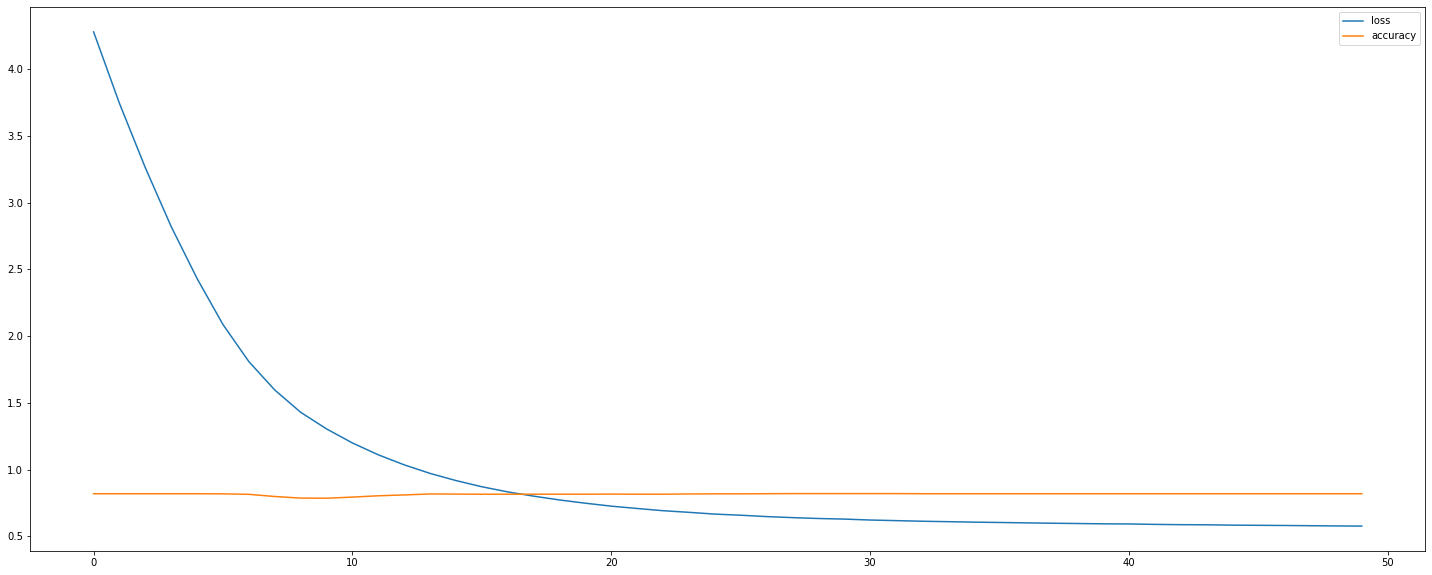

In [241]:
from livelossplot import PlotLossesKeras

history = model.fit(X_train, y_train, epochs=50)
pd.DataFrame(history.history).plot(figsize=(25,10))
plt.show()
y_pred = model.predict(X_test)

<AxesSubplot:>

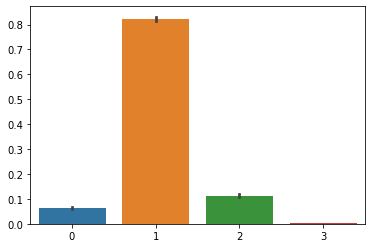

In [242]:
sns.barplot(data=y_pred)

In [243]:
results = model.evaluate(X_train, y_train)
results

35/35 [==============================] - 0s 372us/step - loss: 0.5748 - accuracy: 0.8187


[0.5747621059417725, 0.8186763525009155]

In [244]:
results = model.evaluate(X_test, y_test)
results

15/15 [==============================] - 0s 400us/step - loss: 0.5246 - accuracy: 0.8414


[0.5245940685272217, 0.8414376378059387]

In [245]:
model.save('NN_Model')
print(model.get_weights())

INFO:tensorflow:Assets written to: NN_Model\assets
[array([[-0.40871024,  0.04284511,  0.5278104 ],
       [ 0.05307254, -0.5861613 , -0.45373818],
       [-0.39858225,  0.5091175 , -0.30441016],
       [-0.2412887 ,  0.01634342,  0.20708771],
       [ 0.2041994 , -0.6672563 , -0.27725327],
       [ 0.15656185,  0.3621952 ,  0.42297226],
       [-0.52591306,  0.3391591 , -0.62891304],
       [ 0.11179046, -0.540645  , -0.4972751 ],
       [-0.31367978,  0.56074053, -0.08209932],
       [ 0.01851963, -0.5030767 , -0.27751926]], dtype=float32), array([-0.12558007, -0.18733118,  0.01970894], dtype=float32), array([[ 0.48561132,  0.66095215,  0.75766   ],
       [ 0.24478616, -0.57872146, -0.5348668 ],
       [-0.23772031,  0.37165645, -0.8346993 ]], dtype=float32), array([-0.28142357,  0.01925109,  0.05854682], dtype=float32), array([[-0.15073271, -0.34402436, -0.3750911 , -0.2618981 ],
       [ 0.00488423,  0.6635992 , -0.15888476, -1.5222377 ],
       [-0.9698572 , -0.8004321 , -0.63564